In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
hw =pd.read_csv('hw_data.csv')
hw

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,1
1,1,73,Female,College,54465.0,NaN,0.0,E,5,1
2,2,68,Male,High School,37427.0,married,0.0,D,1,1
3,3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,4,34,Female,College,59325.0,separated,1.0,A,5,0
...,...,...,...,...,...,...,...,...,...,...
105,56,85,Female,University,39063.0,divorced,NaN,F,8,0
106,0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,0
107,73,39,Female,College,55750.0,married,1.0,F,5,1
108,28,80,Female,High School,32142.0,separated,NaN,C,7,1


In [310]:
df=hw.copy()

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          110 non-null    int64  
 1   Age                 110 non-null    int64  
 2   Gender              110 non-null    object 
 3   Education Level     93 non-null     object 
 4   Income              98 non-null     float64
 5   Marital Status      91 non-null     object 
 6   Employment Status   75 non-null     float64
 7   Product Category    97 non-null     object 
 8   Satisfaction Level  110 non-null    int64  
 9   Debt Status         110 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 8.7+ KB


In [312]:
total_missing = df.isna().sum()
total_missing[total_missing > 0]



Education Level      17
Income               12
Marital Status       19
Employment Status    35
Product Category     13
dtype: int64

In [313]:
total_missing.sum()

96

In [314]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Gender                 object
Education Level        object
Income                float64
Marital Status         object
Employment Status     float64
Product Category       object
Satisfaction Level      int64
Debt Status             int64
dtype: object

# Write a function for filling categorical values with mode

In [315]:
fill_categorical = lambda df, column: df[column].fillna(df[column].mode()[0]) if df[column].dtype == 'object' else df[column]


In [316]:
total_missing = df.isna().sum()
total_missing[total_missing > 0]

Education Level      17
Income               12
Marital Status       19
Employment Status    35
Product Category     13
dtype: int64

In [317]:
fill_categorical = lambda df, column: df[column].fillna(df[column].mode()[0]) if df[column].dtype == 'object' else df[column]

columns_to_fill = ['Education Level', 'Marital Status', 'Product Category']

for column in columns_to_fill:
    df[column] = fill_categorical(df, column)


In [318]:
total_missing = df.isna().sum()
total_missing[total_missing > 0]

Income               12
Employment Status    35
dtype: int64

# Fill numeric with mean

In [319]:
fill_numeric = lambda df, column: df[column].fillna(df[column].mean()) if df[column].dtype != 'object' else df[column]


In [320]:
total_missing = df.isna().sum()
total_missing[total_missing > 0]

Income               12
Employment Status    35
dtype: int64

In [321]:
fill_values = lambda df, column: df[column].fillna(df[column].median()) if df[column].dtype != 'object' else df[column].fillna(df[column].mode()[0])

columns_to_fill = ['Income', 'Employment Status']

for column in columns_to_fill:
    df[column] = fill_values(df, column)


In [322]:
total_missing = df.isna().sum()
total_missing[total_missing > 0]

Series([], dtype: int64)

In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,110.0,4.939091e+01,2.879478e+01,0.0,26.25,49.5,73.75,99.0
Age,110.0,9.802727e+01,1.439335e+02,0.0,30.25,54.0,84.00,500.0
Income,110.0,5.125630e+07,1.677805e+08,6740.0,31560.25,38702.5,47943.50,863305114.0
Employment Status,110.0,7.090909e-01,4.562603e-01,0.0,0.00,1.0,1.00,1.0
Satisfaction Level,110.0,4.527273e+00,2.801406e+00,0.0,2.00,5.0,7.00,9.0
Debt Status,110.0,4.636364e-01,5.009582e-01,0.0,0.00,0.0,1.00,1.0


In [324]:
df.describe(include=object).T

,count,unique,top,freq
Gender,110,2,Male,56
Education Level,110,4,University,47
Marital Status,110,5,separated,44
Product Category,110,7,G,33


In [325]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,110.0,NaN,NaN,NaN,49.390909,28.79478,0.0,26.25,49.5,73.75,99.0
Age,110.0,NaN,NaN,NaN,98.027273,143.9335,0.0,30.25,54.0,84.0,500.0
Gender,110,2,Male,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,110,4,University,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,110.0,NaN,NaN,NaN,51256302.327273,167780456.287621,6740.0,31560.25,38702.5,47943.5,863305114.0
Marital Status,110,5,separated,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,110.0,NaN,NaN,NaN,0.709091,0.45626,0.0,0.0,1.0,1.0,1.0
Product Category,110,7,G,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satisfaction Level,110.0,NaN,NaN,NaN,4.527273,2.801406,0.0,2.0,5.0,7.0,9.0
Debt Status,110.0,NaN,NaN,NaN,0.463636,0.500958,0.0,0.0,0.0,1.0,1.0


In [326]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Gender                0
Education Level       0
Income                0
Marital Status        0
Employment Status     0
Product Category      0
Satisfaction Level    0
Debt Status           0
dtype: int64

Why did we fill the missing values?

We need to analyze our data without missing values. Sometime we can drop sometime we can fill our data with mode, mean, median or other methods. This can depend on the data. We fill 96 missing values.

Find duplicates

In [327]:
df_duplicates=df.duplicated(keep=False)
df_duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
105    False
106    False
107    False
108    False
109     True
Length: 110, dtype: bool

In [328]:
df_duplicates.value_counts()

False    102
True       8
Name: count, dtype: int64

In [329]:
df.columns.unique()

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Income',
       'Marital Status', 'Employment Status', 'Product Category',
       'Satisfaction Level', 'Debt Status'],
      dtype='object')

In [330]:
duplicates = df.apply(lambda x: x.duplicated())
for column in duplicates.columns:
    column_duplicates = duplicates[column]
    print(f"Column '{column}' duplicates:")
    print(column_duplicates[column_duplicates == True])
    print(column_duplicates[column_duplicates == True].sum())
    print()


Column 'Unnamed: 0' duplicates:
100    True
101    True
102    True
103    True
104    True
105    True
106    True
107    True
108    True
109    True
Name: Unnamed: 0, dtype: bool
10

Column 'Age' duplicates:
10     True
12     True
19     True
20     True
24     True
28     True
30     True
34     True
38     True
40     True
47     True
50     True
51     True
53     True
56     True
58     True
60     True
62     True
63     True
64     True
65     True
68     True
69     True
70     True
71     True
72     True
73     True
74     True
77     True
80     True
81     True
84     True
88     True
90     True
91     True
92     True
94     True
95     True
97     True
99     True
100    True
101    True
102    True
103    True
104    True
105    True
106    True
107    True
108    True
109    True
Name: Age, dtype: bool
50

Column 'Gender' duplicates:
1      True
3      True
4      True
5      True
6      True
       ... 
105    True
106    True
107    True
108    True
109    True
Na

In [331]:
df.drop_duplicates(keep='first', inplace=True)


In [332]:
df_duplicates=df.duplicated()
df_duplicates.value_counts()

False    106
Name: count, dtype: int64

True values were our duplicate values and deleted from the data

In [333]:
#Calculate numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

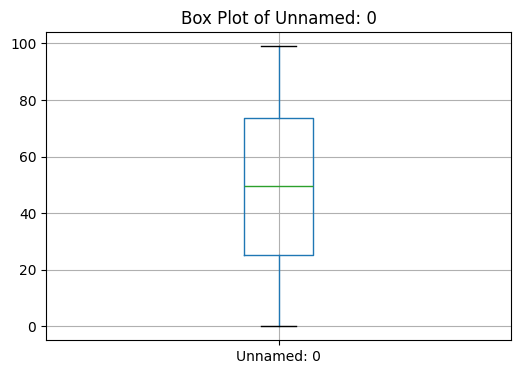

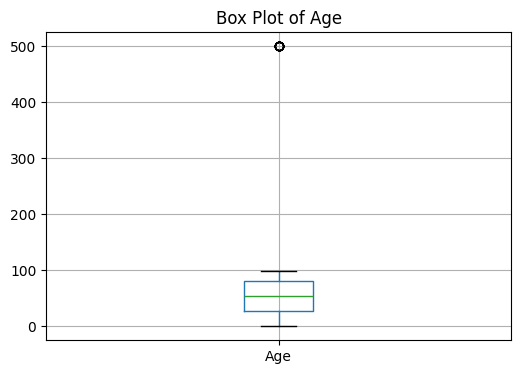

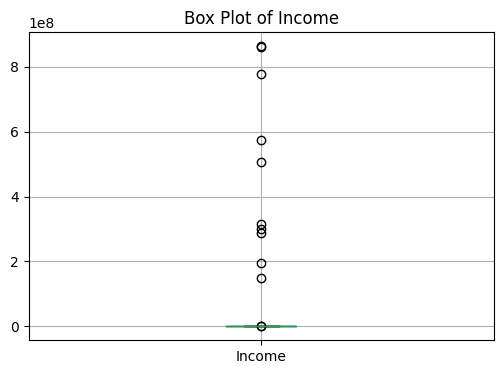

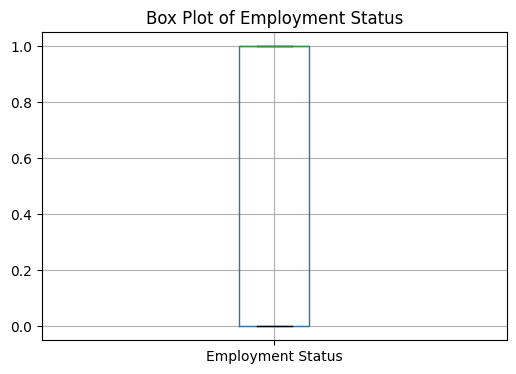

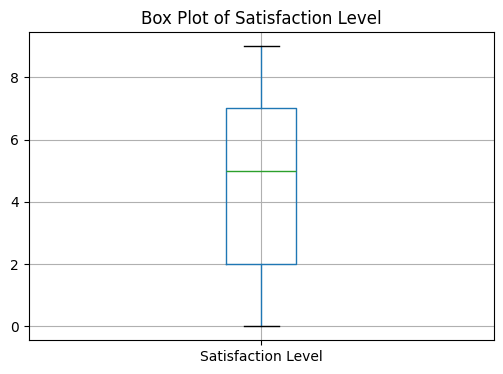

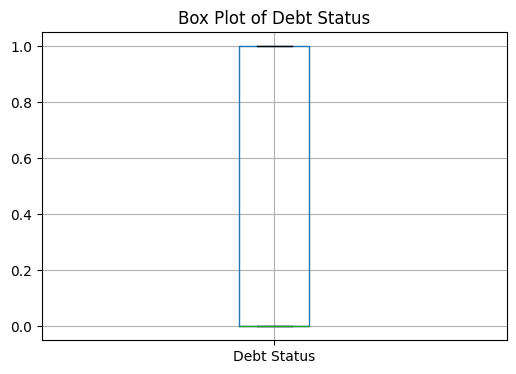

In [334]:
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Calculate outliers

In [335]:
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Outliers in {column}:")
    print(outliers)
    print()

Outliers in Unnamed: 0:
Series([], Name: Unnamed: 0, dtype: int64)

Outliers in Age:
0      500
10     500
20     500
30     500
40     500
50     500
60     500
70     500
80     500
90     500
106    500
Name: Age, dtype: int64

Outliers in Income:
11         6740.0
14    863305114.0
23    195144049.0
32    314696218.0
41    862386254.0
50    575772080.0
59    300245882.0
68    777761952.0
77    286421460.0
86    505250420.0
95    148112279.0
97         7010.0
Name: Income, dtype: float64

Outliers in Employment Status:
Series([], Name: Employment Status, dtype: float64)

Outliers in Satisfaction Level:
Series([], Name: Satisfaction Level, dtype: int64)

Outliers in Debt Status:
Series([], Name: Debt Status, dtype: int64)



In [336]:
df['Age'].mean()

95.5

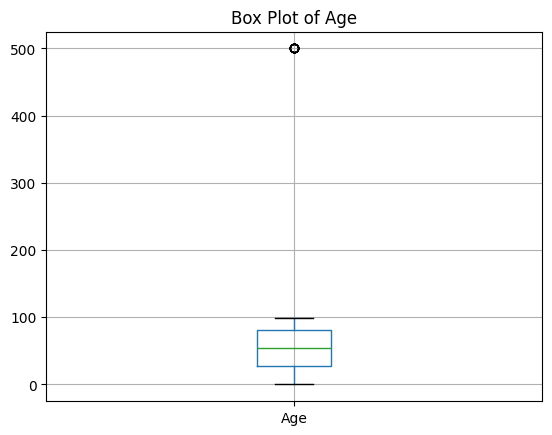

In [337]:

df.boxplot(column=['Age'])
plt.title('Box Plot of Age')
plt.show()


In [338]:
age_500=pd.DataFrame
age_500=df[df['Age']==500]
age_500

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500,Female,University,31158.0,separated,1.0,G,9,1
10,10,500,Female,College,31654.0,never married,1.0,G,7,0
20,20,500,Female,University,64165.0,separated,0.0,A,2,1
30,30,500,Female,High School,18442.0,separated,1.0,A,3,0
40,40,500,Female,College,45140.0,widowed,0.0,D,9,0
50,50,500,Male,University,575772080.0,married,0.0,D,5,0
60,60,500,Female,College,34060.0,separated,1.0,G,7,0
70,70,500,Male,High School,21593.0,never married,1.0,D,3,1
80,80,500,Male,University,60010.0,married,1.0,E,7,1
90,90,500,Female,University,31759.0,separated,1.0,G,6,0


In [339]:
female_married_avg_age = df[(df['Gender'] == 'Female') & (df['Marital Status'] == 'married')]['Age'].mean()
print(female_married_avg_age)
male_married_avg_age = df[(df['Gender'] == 'Male') & (df['Marital Status'] == 'married')]['Age'].mean()
print(male_married_avg_age)

35.3
111.92307692307692


# Fill the wrong values with average of age

In [340]:
df.loc[(df['Age'] == 500) & (df['Gender'] == 'Female') & (df['Marital Status'] == 'married'), 'Age'] = female_married_avg_age
df.loc[(df['Age'] == 500) & (df['Gender'] == 'Male') & (df['Marital Status'] == 'married'), 'Age'] = male_married_avg_age

C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\439695647.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] == 500) & (df['Gender'] == 'Female') & (df['Marital Status'] == 'married'), 'Age'] = female_married_avg_age


In [341]:
age_500=df[df['Age']==500]
age_500

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500.0,Female,University,31158.0,separated,1.0,G,9,1
10,10,500.0,Female,College,31654.0,never married,1.0,G,7,0
20,20,500.0,Female,University,64165.0,separated,0.0,A,2,1
30,30,500.0,Female,High School,18442.0,separated,1.0,A,3,0
40,40,500.0,Female,College,45140.0,widowed,0.0,D,9,0
60,60,500.0,Female,College,34060.0,separated,1.0,G,7,0
70,70,500.0,Male,High School,21593.0,never married,1.0,D,3,1
90,90,500.0,Female,University,31759.0,separated,1.0,G,6,0
106,0,500.0,Female,University,31158.0,separated,1.0,G,9,0


In [342]:
# Calculate the average age of rows where Gender is Female and Education Level is University
female_university_avg_age = df[(df['Gender'] == 'Female') & (df['Education Level'] == 'University')]['Age'].mean()
print(female_university_avg_age)

# Fill the 500 values with this average age
df.loc[(df['Age'] == 500) & (df['Gender'] == 'Female') & (df['Education Level'] == 'University'), 'Age'] = female_university_avg_age


146.26315789473685


In [343]:
age_500=df[df['Age']==500]
age_500

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
10,10,500.0,Female,College,31654.0,never married,1.0,G,7,0
30,30,500.0,Female,High School,18442.0,separated,1.0,A,3,0
40,40,500.0,Female,College,45140.0,widowed,0.0,D,9,0
60,60,500.0,Female,College,34060.0,separated,1.0,G,7,0
70,70,500.0,Male,High School,21593.0,never married,1.0,D,3,1


In [344]:
age_mean= df['Age'].mean()
print(age_mean)
df.loc[(df['Age'] == 500)] = age_mean

74.8292338247651


C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\2547517527.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.8292338247651' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] == 500)] = age_mean


In [345]:
df['Age'].mean()

54.77400900517855

In [346]:
df['Age'] = df['Age'].astype(int)
df['Age'].max()


146

In [347]:
max_age_row = df[df['Age'] == df['Age'].max()]
print(max_age_row)


     Unnamed: 0  Age  Gender Education Level   Income Marital Status  \
0           0.0  146  Female      University  31158.0      separated   
20         20.0  146  Female      University  64165.0      separated   
90         90.0  146  Female      University  31759.0      separated   
106         0.0  146  Female      University  31158.0      separated   

     Employment Status Product Category  Satisfaction Level  Debt Status  
0                  1.0                G                 9.0          1.0  
20                 0.0                A                 2.0          1.0  
90                 1.0                G                 6.0          0.0  
106                1.0                G                 9.0          0.0  


In [348]:
age_100=pd.DataFrame
age_100=df[df['Age']>100]
age_100

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0.0,146,Female,University,31158.0,separated,1.0,G,9.0,1.0
20,20.0,146,Female,University,64165.0,separated,0.0,A,2.0,1.0
50,50.0,111,Male,University,575772080.0,married,0.0,D,5.0,0.0
80,80.0,111,Male,University,60010.0,married,1.0,E,7.0,1.0
90,90.0,146,Female,University,31759.0,separated,1.0,G,6.0,0.0
106,0.0,146,Female,University,31158.0,separated,1.0,G,9.0,0.0


In [350]:
df.loc[df['Age'] > 100, 'Age'] = np.nan
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\1113245114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [351]:
df['Age'].mean()

49.93

# After filling the missing values check our data

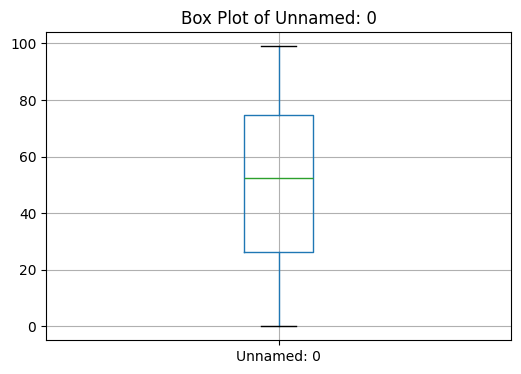

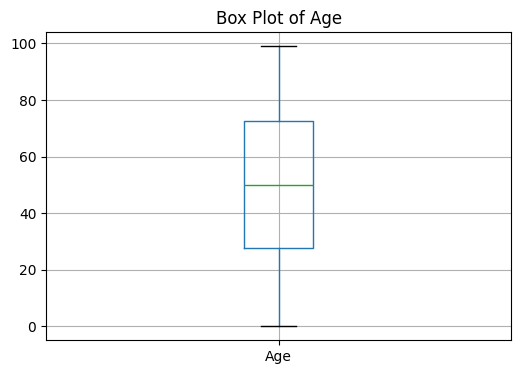

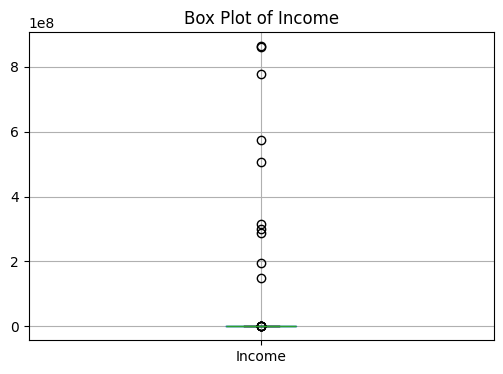

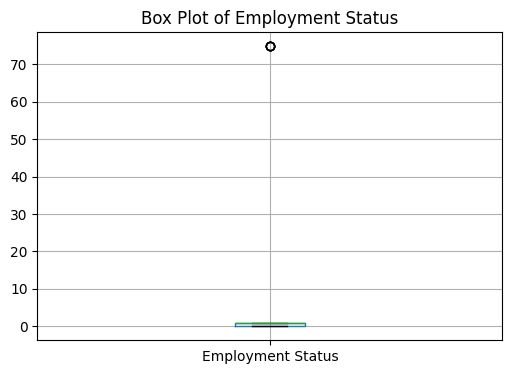

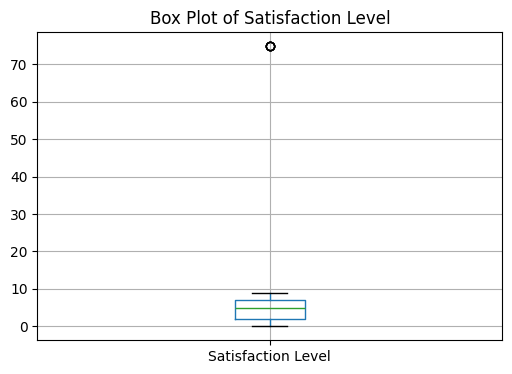

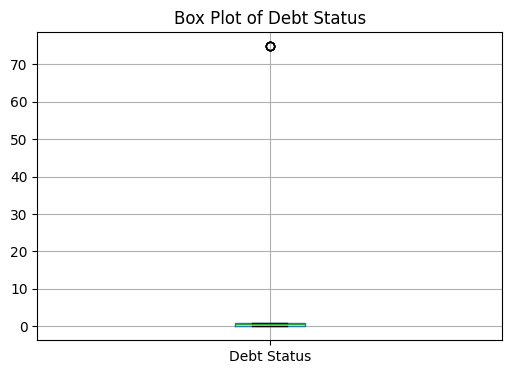

In [352]:
#Calculate numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Handling outliers with the other columns

In [363]:
def calculate_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calculate Outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
median_status = df[column].median()
df.loc[outliers.index, column] = median_status

In [364]:
calculate_outliers(df,'Debt Status')

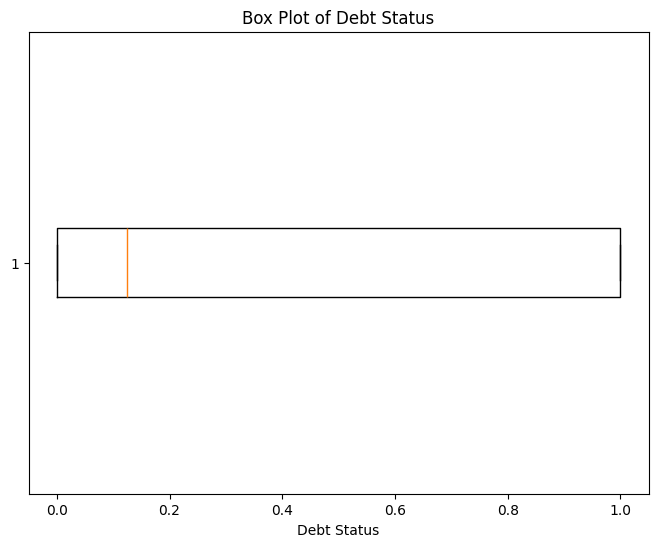

In [365]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Debt Status'], vert=False)
plt.title('Box Plot of Debt Status')
plt.xlabel('Debt Status')
plt.show()

In [366]:
calculate_outliers(df,'Satisfaction Level')

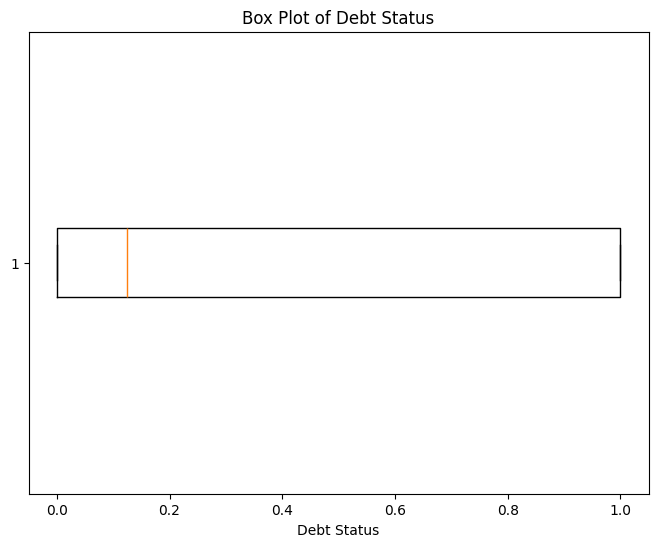

In [367]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Debt Status'], vert=False)
plt.title('Box Plot of Debt Status')
plt.xlabel('Debt Status')
plt.show()

In [370]:
calculate_outliers(df,'Employment Status')

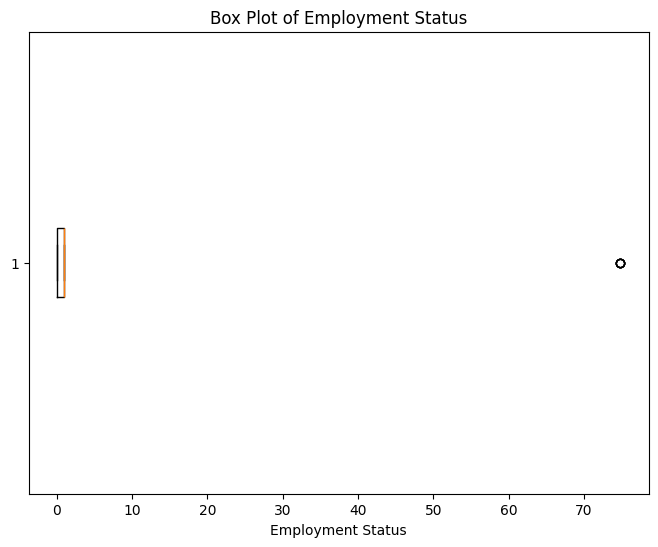

In [371]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Employment Status'], vert=False)
plt.title('Box Plot of Employment Status')
plt.xlabel('Employment Status')
plt.show()

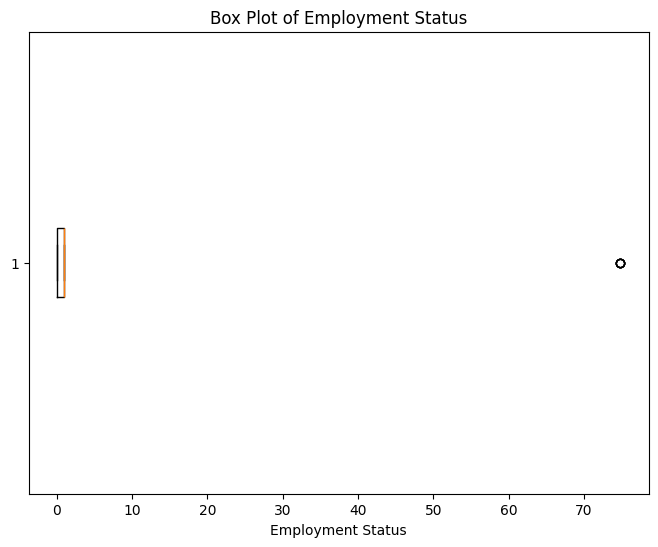

In [362]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Employment Status'], vert=False)
plt.title('Box Plot of Employment Status')
plt.xlabel('Employment Status')
plt.show()

In [372]:
calculate_outliers(df,'Income')

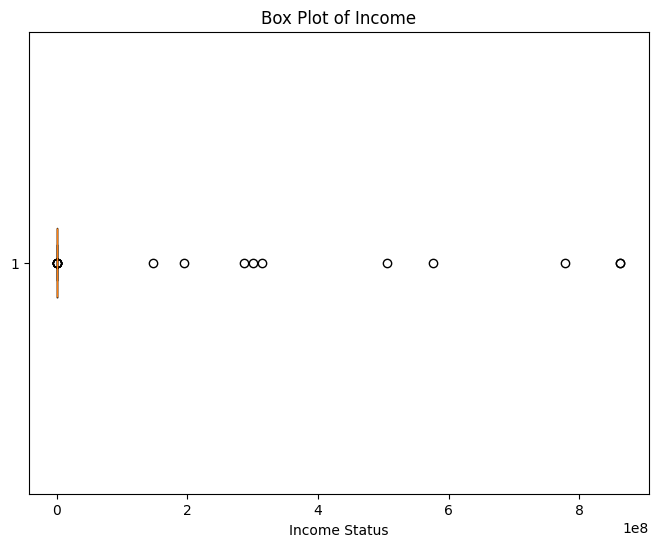

In [373]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.title('Box Plot of Income')
plt.xlabel('Income Status')
plt.show()

In [374]:
df['Satisfaction Level']

0      9.0
1      5.0
2      1.0
3      8.0
4      5.0
      ... 
104    0.0
105    8.0
106    9.0
107    5.0
108    7.0
Name: Satisfaction Level, Length: 106, dtype: float64

In [375]:
calculate_outliers(df,'Satisfaction Level')

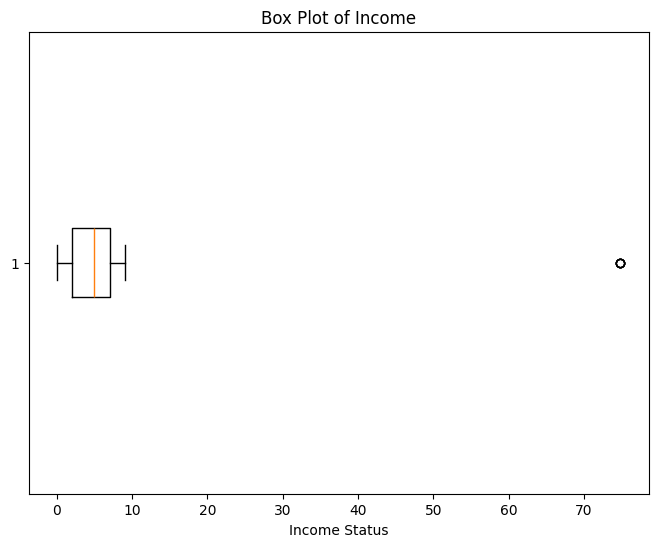

In [376]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Satisfaction Level'], vert=False)
plt.title('Box Plot of Income')
plt.xlabel('Income Status')
plt.show()

In [377]:
df[df['Satisfaction Level']>10]

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
10,74.829234,74.0,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,0.25
30,74.829234,74.0,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,0.25
40,74.829234,74.0,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,0.25
60,74.829234,74.0,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,0.25
70,74.829234,74.0,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,74.829234,0.25


In [383]:
# Select rows that satisfy the condition
condition = df['Satisfaction Level'] > 10
filtered_df = df[condition]

# Calculate the mean value of the selected rows
mean_value =df['Satisfaction Level'].mean()

# Fill the selected rows with the mean value
df.loc[condition, 'Satisfaction Level'] = mean_value



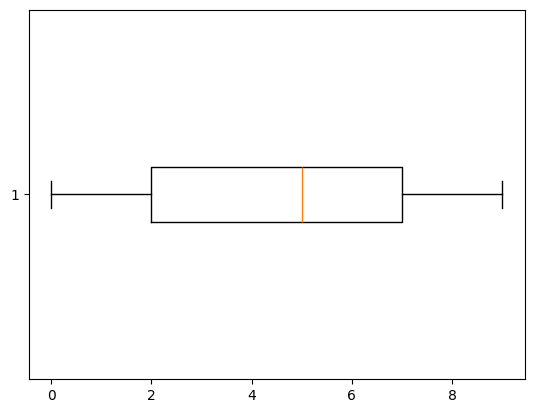

In [384]:
plt.boxplot(df['Satisfaction Level'], vert=False)
plt.show()

# Changed the inconsistent values in column 'Age' changed the datatype to int

In [282]:
df['Satisfaction Level'].dtype

dtype('float64')

In [283]:
df['Satisfaction Level'].unique()

array([84.27527818,  5.        ,  1.        ,  8.        ,  3.        ,
        0.        ,  4.        ,  9.        ,  6.        ,  2.        ,
        7.        ])

In [442]:
df.loc[df['Satisfaction Level'] == 84.27527818, 'Satisfaction Level'] = np.nan



In [443]:
df['Satisfaction Level'].unique()

array([9., 5., 1., 8., 3., 0., 4., 6., 2., 7.])

In [455]:
mean_value = df['Satisfaction Level'].mean()
print(mean_value)
df['Satisfaction Level'] = df['Satisfaction Level'].fillna(mean_value)
df['Satisfaction Level']



4.475247524752476


0      9.0
1      5.0
2      1.0
3      8.0
4      5.0
      ... 
104    0.0
105    8.0
106    9.0
107    5.0
108    7.0
Name: Satisfaction Level, Length: 101, dtype: float64

In [456]:
# Create ranges for categories
label_ranges = [0, 4, 8, 10]
label_names = ['Low', 'Moderate', 'High']
# Create wait_type column
df['Satisfaction Category'] = pd.cut(df['Satisfaction Level'], bins = label_ranges, 
                                labels = label_names)

In [457]:
df['Satisfaction Category'].dtype

CategoricalDtype(categories=['Low', 'Moderate', 'High'], ordered=True, categories_dtype=object)

In [458]:
df['Satisfaction Category']

0          High
1      Moderate
2           Low
3      Moderate
4      Moderate
         ...   
104         NaN
105    Moderate
106        High
107    Moderate
108    Moderate
Name: Satisfaction Category, Length: 101, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [460]:
df['Satisfaction Category'].unique()

['High', 'Moderate', 'Low', NaN]
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [461]:
df['Satisfaction Category'].isna().sum()

9

In [462]:
# Find the nulls
mode_value = df['Satisfaction Category'].mode()[0]

# NaN change with mode
df['Satisfaction Category'].fillna(mode_value, inplace=True)


In [463]:
df['Satisfaction Category'].isna().sum()

0

In [411]:
# Defining the intervals for categorization
bins = [0, 30000, 60000, np.inf]

# Defining labels for the categories
labels = ['Low', 'Moderate', 'High']

# Creating a new column for the categorized income levels
df['Income Category'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Checking the results
print(df[['Income', 'Income Category']].head())


    Income Income Category
0  31158.0        Moderate
1  54465.0        Moderate
2  37427.0        Moderate
3  52210.0        Moderate
4  59325.0        Moderate


In [412]:
# Grouping the DataFrame by 'Marital Status' and 'Debt Status', then calculating the count of each group
grouped_data = df.groupby(['Marital Status', 'Debt Status']).size()

# Unstacking the DataFrame to pivot the 'Debt Status' index level to columns
unstacked_data = grouped_data.unstack()

# Displaying the unstacked DataFrame

print(unstacked_data)



Debt Status     0.0  1.0
Marital Status          
divorced          5    7
married          12   11
never married     3    5
separated        21   18
widowed          12    7


In [289]:
# Creating a pivot table to analyze the relationship between 'Marital Status' and 'Debt Status'
pivot_table = df.pivot_table(index='Marital Status', columns='Debt Status', aggfunc='size')
print(pivot_table)

Debt Status     0.000000   1.000000   84.275278
Marital Status                                 
84.275278             NaN        NaN        8.0
divorced              5.0        7.0        NaN
married              12.0       11.0        NaN
never married         3.0        5.0        NaN
separated            11.0       10.0        NaN
widowed              12.0        7.0        NaN


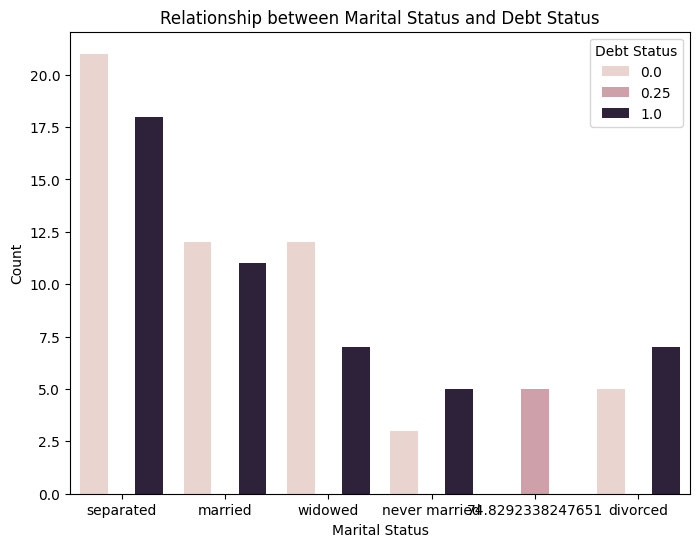

In [389]:
import seaborn as sns
# Create a count plot to visualize the relationship between 'Marital Status' and 'Debt Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', hue='Debt Status', data=df)
plt.title('Relationship between Marital Status and Debt Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


In [390]:
df['Marital Status'].unique()

array(['separated', 'married', 'widowed', 'never married',
       74.8292338247651, 'divorced'], dtype=object)

In [401]:
# Cahnge the name in Marital Status 
df['Marital Status'] = df['Marital Status'].replace(74.8292338247651, 'others')


In [402]:
df['Marital Status'].unique()

array(['separated', 'married', 'widowed', 'never married', 'Others',
       'divorced'], dtype=object)

In [403]:
# Remove rows where 'Marital Status' is 'Others'
df = df[df['Marital Status'] != 'Others']


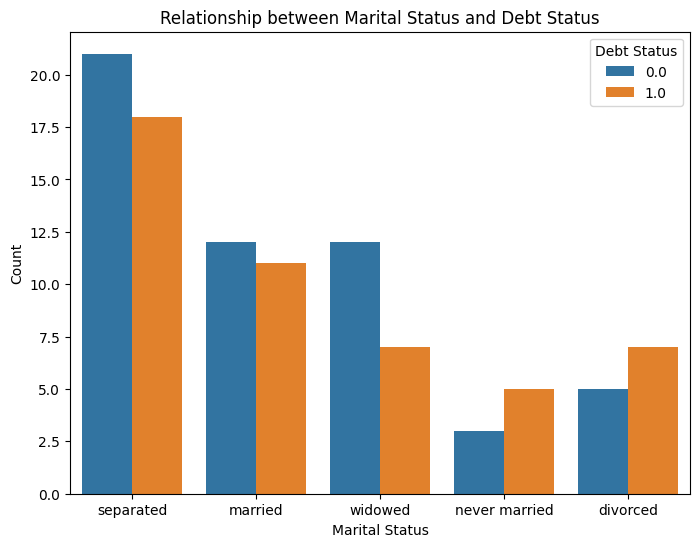

In [404]:
# Create a count plot to visualize the relationship between 'Marital Status' and 'Debt Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', hue='Debt Status', data=df)
plt.title('Relationship between Marital Status and Debt Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Those who live separately have the highest debt-free rate and debt-free rate, but the number of debt-free people is higher. The lowest debt ratio is seen among those who have never been married.

C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\820781020.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Income Category', 'Debt Status']).size().unstack()


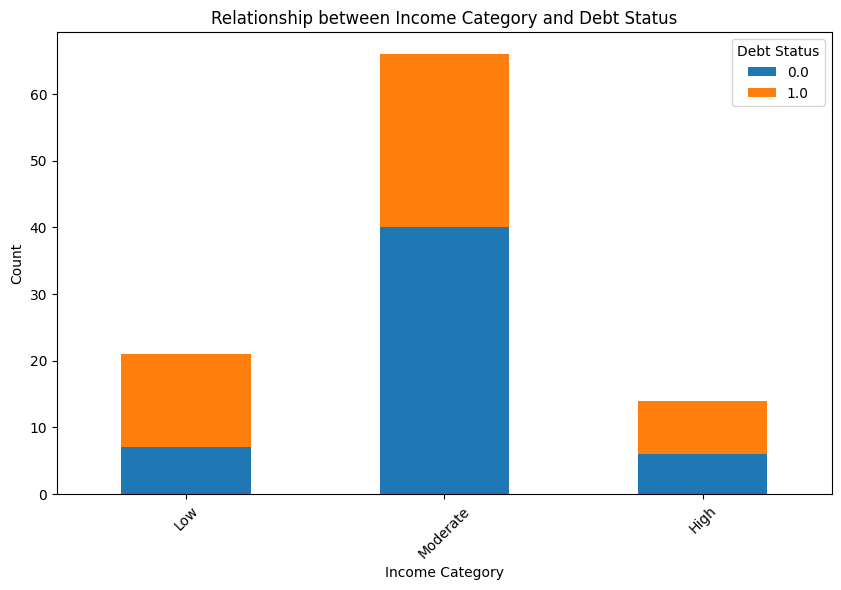

In [467]:
# Grouping by Income Category and Debt Status
grouped = df.groupby(['Income Category', 'Debt Status']).size().unstack()

# Creating a stacked bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Income Category and Debt Status')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the axis labels by 45 degrees
plt.legend(title='Debt Status')
plt.show()


We had the chance to observe in this graph. The graph shows that there are more people with middle income, those who are debt-free, than those who are in debt. The debt ratio is higher in people with low income. We see that people with high incomes are equally debt-free and debt-free.

C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\2447109890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Education Level', 'Satisfaction Category']).size().unstack()


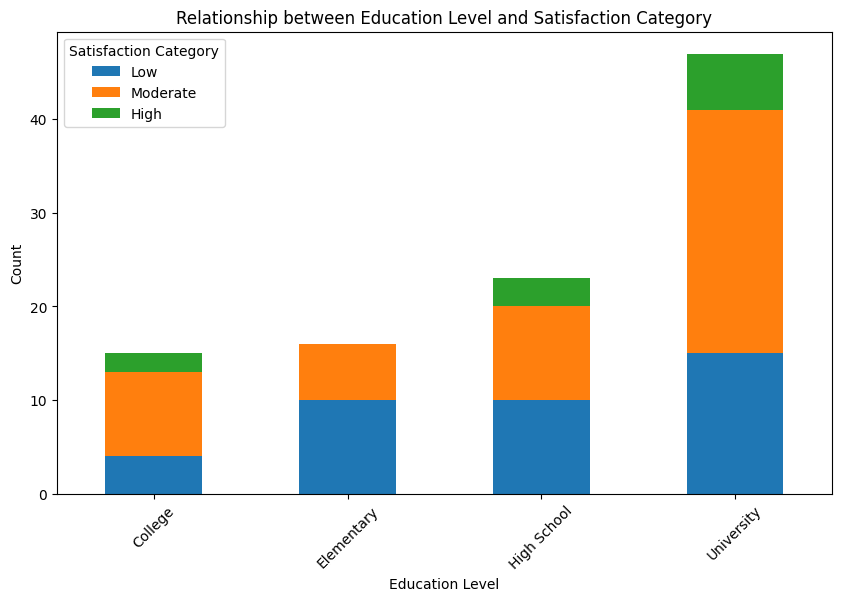

In [465]:
# Grouping by Education Level and Satisfaction Category
grouped = df.groupby(['Education Level', 'Satisfaction Category']).size().unstack()

# Creating a bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Education Level and Satisfaction Category')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the axis labels by 45 degrees
plt.legend(title='Satisfaction Category')
plt.show()


We see that the satisfaction rate of university graduates is the highest. Their moderate value is higher than the others. There is no high satisfaction in elemantry.

C:\Users\MainUser\AppData\Local\Temp\ipykernel_19140\3708772038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Employment Status', 'Satisfaction Category']).size().unstack()


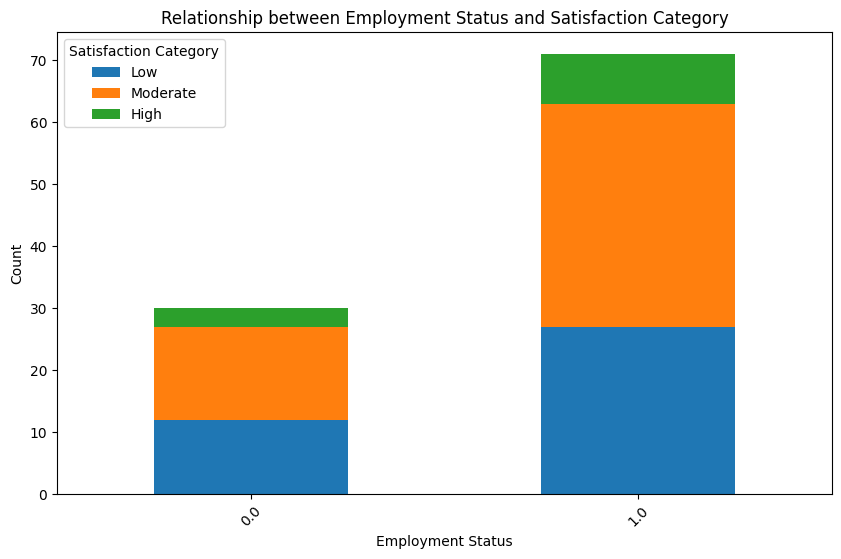

In [466]:
# Grouping by Employment Status and Satisfaction Category
grouped = df.groupby(['Employment Status', 'Satisfaction Category']).size().unstack()

# Creating a grouped bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Employment Status and Satisfaction Category')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the axis labels by 45 degrees
plt.legend(title='Satisfaction Category')
plt.show()


The moderate satisfaction rate is highest among those who are employed. Although high satisfaction is lowest among the unemployed, medium and low satisfaction rates are equal.